In [1]:
import os

import torch
from unityagents import UnityEnvironment
import numpy as np
from TD3_agent import Agent
import matplotlib.pyplot as plt

'''
Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
env = UnityEnvironment(file_name="Reacher.app")
'''

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 10	Average Score : 0.59 	 eps : 0.990
Episode 20	Average Score : 0.80 	 eps : 0.980
Episode 30	Average Score : 0.89 	 eps : 0.969
Episode 40	Average Score : 0.86 	 eps : 0.959
Episode 50	Average Score : 0.78 	 eps : 0.949
Episode 60	Average Score : 0.71 	 eps : 0.939
Episode 70	Average Score : 0.72 	 eps : 0.929
Episode 80	Average Score : 0.79 	 eps : 0.918
Episode 90	Average Score : 0.92 	 eps : 0.908
Episode 100	Average Score : 1.13 	 eps : 0.898
Episode 110	Average Score : 1.49 	 eps : 0.888
Episode 120	Average Score : 2.15 	 eps : 0.878
Episode 130	Average Score : 3.40 	 eps : 0.867
Episode 140	Average Score : 5.31 	 eps : 0.857
Episode 150	Average Score : 7.33 	 eps : 0.847
Episode 160	Average Score : 9.49 	 eps : 0.837
Episode 170	Average Score : 11.56 	 eps : 0.827
Episode 180	Average Score : 13.58 	 eps : 0.816
Episode 190	Average Score : 15.38 	 eps : 0.806
Episode 200	Average Score : 17.29 	 eps : 0.796
Episode 210	Average Score : 19.53 	 eps : 0.786
Episode 220	Avera

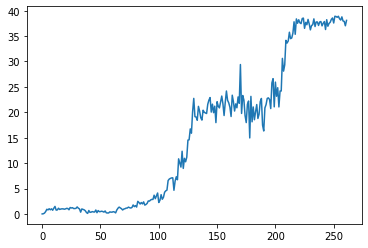

In [2]:
env = UnityEnvironment(file_name=os.getcwd() + "/Reacher_Windows_x86_64/Reacher.exe")

# ## Setting
state = 'Train'
# state = 'Test'
mode = 'slow'
# mode = 'fast'

# ## Train & Test
agent = Agent(env=env, random_seed=18)
if state == 'Train':
    scores = agent.train(n_episodes=3000, max_t=3000)
    plt.plot(scores)
else: # Test     
    agent.actor_local.load_state_dict(torch.load(os.getcwd() + '/saved_model/saved_TD3_actor.pth'))
    agent.critic_local_1.load_state_dict(torch.load(os.getcwd() + '/saved_model/saved_TD3_critic_1.pth'))
    agent.critic_local_2.load_state_dict(torch.load(os.getcwd() + '/saved_model/saved_TD3_critic_2.pth'))
    print('='*30)
    print('Sucessfully loaded')
    print('='*30)
    score_test = []                                  
    for test_episode in range(1, 100+1):
        train_mode = True if mode == 'fast' else False
        env_info = agent.env.reset(train_mode=train_mode)[agent.brain_name]      # reset the environment
        state = env_info.vector_observations                         # get the current state
        score_temp = 0.                                              # initialize the score
        while True:
            action = agent.act(state, add_noise=False)               # select an action
            env_info = env.step(action)[agent.brain_name]            # send the action to the environment
            next_state = env_info.vector_observations                # get the next state
            reward = env_info.rewards                                # get the reward
            done = env_info.local_done                               # see if episode has finished
            score_temp += np.mean(reward)                            # update the score
            state = next_state                                       # roll over the state to next time step
            if any(done):                                            # exit loop if episode finished
                score_test.append(score_temp)
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(test_episode, np.mean(score_test)), end="")
                score_temp = 0.
                break
        
    print("\nFinal Score: {}".format(np.mean(score_test)))
    agent.env.close()